In [1]:
import pandas as pd
from scipy.stats import shapiro, spearmanr, pearsonr
from utils.graphics import *
from utils.preformatting_data import *

data = preformat(pd.read_csv('../medics_1.csv', delimiter=',', encoding='utf-8'))

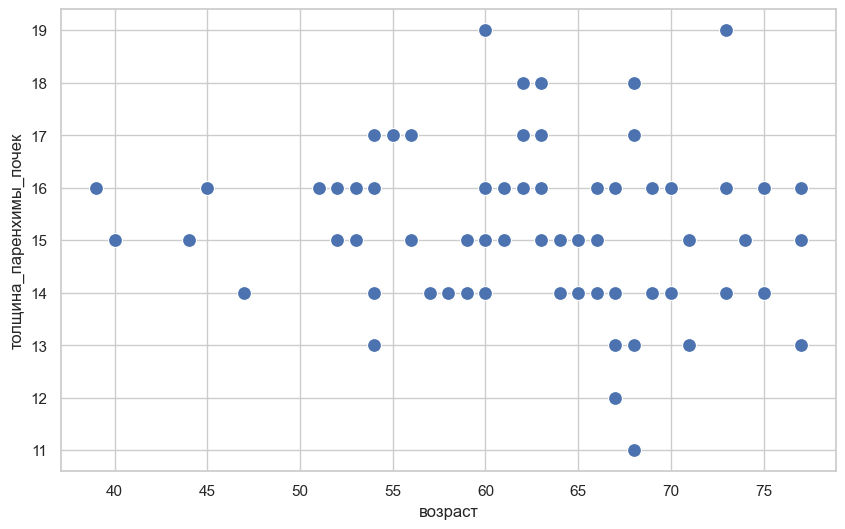

In [2]:
# берем данные, где нет хбп, строим график скаттер для выявления зависимости
data_without_hbp = data.loc[data['хбп'] == 0]
viz_data_scatter(data_without_hbp, 'возраст',
                 'толщина_паренхимы_почек')

In [5]:
# посмотрим на взаимосвязь используя аналитические методы:
if shapiro(data['возраст'])[1] >= 0.05 and shapiro(data['толщина_паренхимы_почек'])[1] >= 0.05:
    print(round(data[['толщина_паренхимы_почек', 'возраст']].corr(method='pearson'), 4))
    corr, p_value = pearsonr(data['возраст'], data['толщина_паренхимы_почек'])
else:
    print(round(data[['толщина_паренхимы_почек', 'возраст']].corr(method='spearman'), 4))
    corr, p_value = spearmanr(data['возраст'], data['толщина_паренхимы_почек'])

                         толщина_паренхимы_почек  возраст
толщина_паренхимы_почек                   1.0000  -0.1436
возраст                                  -0.1436   1.0000


In [4]:
print(f"Correlation check: {round(corr, 4)}")
print(f"P-value: {round(p_value, 4)}")

Correlation check: -0.1436
P-value: 0.0729


Ответ: Нет, связь между толщиной паренхимы почек и возрастом не доказана